## Trabalho T4 - Integração Numérica

### MTM224 - Mét. Numéricos Computacionais

**Curso:** Ciência da Computação

**Turma:** 

**Nome(s):** Lucas Both Steinmetz Ribeiro e Murilo Hesse Block

### Questão 1
Use os programas desenvolvidos nas aulas para integrar numericamente a função $$\int_0^3{x^2e^x}dx$$ usando a regra dos trapézios, a regra de 1/3 de Simpson e a regra de 3/8 de Simpson com 12 subintervalos. Compare dos resultados obtidos com a solução exata.


In [49]:
import numpy as np

In [50]:
x0 = 0; xn = 3 
f = lambda x: x**2 * np.exp(x)
s = 98.427684615938338704642648272909


In [51]:
for n in [12]:
    h = (xn-x0)/n
    xi = np.linspace(x0, xn, n+1)   
    It = h*((f(xi[0])+f(xi[-1]))/2 + np.sum(f(xi[1:-1])))
    print ("n=",n,", I=",It)
    print("solução exata: ", s)

np.trapz(f(xi),dx=h)

n= 12 , I= 99.99331307969648
solução exata:  98.42768461593833


99.99331307969648

In [52]:
for n in [12]:
    h = (xn-x0)/n
    x = np.linspace(x0, xn, n+1) 
    y = f(x)
    I = (h/3)*(y[0] + 4*np.sum(y[1:n:2]) + 2*np.sum(y[2:n:2])+ y[-1])
    print ("n=",n,", I=",I)
    print("solução exata: ", s)

n= 12 , I= 98.44175237978553
solução exata:  98.42768461593833


In [53]:
for n in [12]:
    h = (xn-x0)/n
    x = np.linspace(x0, xn, n+1) 
    y = f(x)
    # Regra 3/8 de Simpson usando funções do numpy
    I = (3*h/8)*(y[0] + 3*np.sum(y[1:n-1:3]+y[2:n:3]) +\
                 2*np.sum(y[3:n:3])+ y[-1])
    print ("n=",n,", I=",I)
    print("solução exata: ", s)

n= 12 , I= 98.458927988704
solução exata:  98.42768461593833


### Questão 2
De um velocímetro de um automóvel foram obtidas as seguintes leituras de velocidade instantânea:
$$
\begin{array}{ccccccccccc}
\hline
t(min) &0 &4 &8 &12 &16 &20 &24 &28 &32 &36 &40 \\ \hline
v(km/h) &24 &23 &35 &39 &45 &49 &55 &58 &64 &71 &79\\ \hline
\hline
\end{array}
$$
Calcule a distância, depois de 40 minutos, em quilômetros, percorrida pelo automóvel utilizando algum dos métodos e programas vistos em aula.


In [54]:
tempo = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40])  
velocidade = np.array([24, 23, 35, 39, 45, 49, 55, 58, 64, 71, 79]) 

def f(t):
    return np.interp(t, tempo, velocidade)

x0 = 0; xn = 40
n = 1000

h = (xn - x0) / n
xi = np.linspace(x0, xn, n + 1)
It = h * ((f(xi[0]) + f(xi[-1])) / 2 + np.sum(f(xi[1:-1])))
print("Distancia :", It, "km")


Distancia : 1962.0 km


### QUESTÃO 3

Suponha que uma força para cima de resistência do ar em um objeto em queda livre seja proporcional
	ao quadrado da velocidade. Nesse caso, a velocidade pode ser calculada por 
	$$ v(t) = \sqrt{\frac{gm}{c_d}} tanh\left(\sqrt{\frac{gc_d}{m}}t\right)$$
em que $c_d$ é o coeficiente de arrasto de segunda ordem. 
	Se $g=9,81 m/s^2$, $m=68,1 kg$, e $c_d=0,25 kg/m$, calcule, usando um programa em Python e integração numérica, quanto o objeto cai em $10 s$. 
	Use um número de intervalos suficientemente grande para que se tenha pelo menos três 
	casas decimais de precisão.

In [55]:
from scipy.integrate import odeint

g = 9.81
m = 68.1
cd = 0.25

def model(v, t):
    return np.sqrt(g * m / cd) * np.tanh(np.sqrt(g * cd / m) * t)

t = np.linspace(0, 10, 1000)
v0 = 0

v = odeint(model, v0, t)

distance = np.trapz(v[:, 0], t)

print(f"A distância percorrida em 10 segundos é: {distance:.4f} metros")

A distância percorrida em 10 segundos é: 1270.8046 metros


### QUESTÃO 4
Usando o método de Euler, determine uma solução aproximada para o PVI dado por
$$ \begin{cases} 
y'= \frac{1}{x^2}-\frac{y}{x}-y^2\\ 
y(1)=-1
\end{cases}$$
com $x \in [1,2]$ e $N=10$.


Iteração 1: x = 1.0000, y = -0.9000
Iteração 2: x = 1.1000, y = -0.8165
Iteração 3: x = 1.2000, y = -0.7457
Iteração 4: x = 1.3000, y = -0.6848
Iteração 5: x = 1.4000, y = -0.6318
Iteração 6: x = 1.5000, y = -0.5851
Iteração 7: x = 1.6000, y = -0.5437
Iteração 8: x = 1.7000, y = -0.5067
Iteração 9: x = 1.8000, y = -0.4733
Iteração 10: x = 1.9000, y = -0.4431


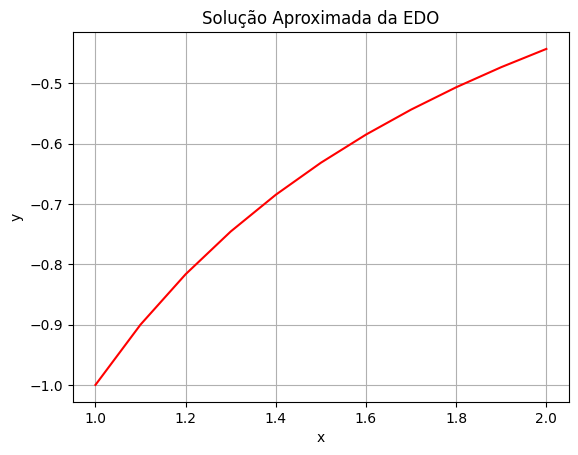

In [57]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1

x0 = 1.0
xn = 2.0

N = int((xn - x0) / h)

X = np.arange(x0, xn + h, h)

Y = [-1.0]

f = lambda x, y: 1/x**2 - y/x - y**2

for i, x in enumerate(X[0:N]):
    Y.append(Y[-1] + f(x, Y[-1]) * h)
    print(f'Iteração {i + 1}: x = {x:.4f}, y = {Y[-1]:.4f}')

plt.plot(X, Y, "r-")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solução Aproximada da EDO')
plt.grid()
plt.show()


### QUESTÃO 5
Dados o PVI abaixo e a sua solução exata, use dois métodos diferentes para estimar $u(t)$ com o passo sugerido, plote e comente os resultados.

$$ \begin{cases} 
u'= t^2(5-u)\\ 
0 \leq t \leq 2 \\
u(0)=0
\end{cases}$$
Solução exata: $u(t)=5-5e^{-t^3/3}$. Use passo $h=0,25$ e também $h=0,1$.

In [58]:
def euler_method(t0, tn, u0, h):
    T = np.arange(t0, tn + h, h)
    U = [u0]

    # Método de Euler
    for t in T[:-1]:
        U.append(U[-1] + h * f(t, U[-1]))

    return T, U


def runge_kutta_method(t0, tn, u0, h):
    T = np.arange(t0, tn + h, h)
    U = [u0]

    # Método de Runge-Kutta de quarta ordem
    for t in T[:-1]:
        k1 = h * f(t, U[-1])
        k2 = h * f(t + h/2, U[-1] + k1/2)
        k3 = h * f(t + h/2, U[-1] + k2/2)
        k4 = h * f(t + h, U[-1] + k3)

        U.append(U[-1] + (k1 + 2*k2 + 2*k3 + k4)/6)

    return T, U

Pelo método de Euler, o h = 0.1 parece se aproximar mais da solução exata. Porém, o método de Runge Kutta parece se aproximar ainda mais e, nesse método,
os h parecem obter resultados semelhantes.


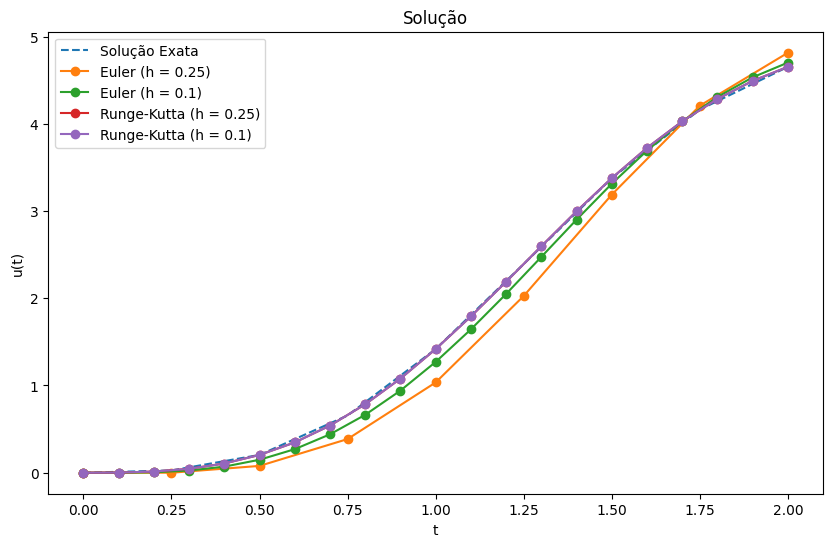

In [67]:
import numpy as np
import matplotlib.pyplot as plt


f = lambda t, u: t**2 * (5 - u)

u0 = 0.0

exact_solution = lambda t: 5 - (5) * np.exp(-t**3 / 3)

t0 = 0.0
tn = 2.0
h1 = 0.25
h2 = 0.1

T1, U1 = euler_method(t0, tn, u0, h1)

T2, U2 = euler_method(t0, tn, u0, h2)

T_rk, U_rk = runge_kutta_method(t0, tn, u0, h1)
T_rk, U_rk = runge_kutta_method(t0, tn, u0, h2)

exact_values = exact_solution(T1)

print("Pelo método de Euler, o h = 0.1 parece se aproximar mais da solução exata. Porém, o método de Runge Kutta parece se aproximar ainda mais e, nesse método,\nos h parecem obter resultados semelhantes.")

plt.figure(figsize=(10, 6))

plt.plot(T1, exact_values, label='Solução Exata', linestyle='--')
plt.plot(T1, U1, label=f'Euler (h = {h1})', marker='o')
plt.plot(T2, U2, label=f'Euler (h = {h2})', marker='o')
plt.plot(T_rk, U_rk, label=f'Runge-Kutta (h = {h1})', marker='o')
plt.plot(T_rk, U_rk, label=f'Runge-Kutta (h = {h2})', marker='o')


plt.title("Solução")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend()
plt.show()
